#  Predictive modeling: Overcrowding

## 1. Import libraries and data

In [9]:
# Data handling and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
%matplotlib inline 

## Machine learning libraries
from sklearn import datasets, metrics
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score,mean_absolute_error, accuracy_score, roc_curve, roc_auc_score, f1_score, recall_score, average_precision_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso

import xgboost as xgb
import missingno as msno


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
chelsea_df = pd.read_csv('chelsea_clean.csv', low_memory=False, index_col=0)

In [11]:
chelsea_all = pd.read_csv('chelsea_all.csv', low_memory = False, index_col = 0)

In [12]:
chelsea = chelsea_df.copy()
chelsea.shape

(1611, 109)

In [13]:
chelsea.head(2)

,Building Permits - Count,See Click Fix - Count,Fire Incidents - Count,Foreclosure Sales - Count,Vacant Foreclosed Properties,Property Sales - Count,Property Sales - Price,40U Violations - Count,40U Violations - Fine,Police Incidents - Count,Rat Baiting - Count,Tax Title,Total Assessed Value,Bedrooms,Building Size,Full Bathrooms,Land Size,Owner Occupied,Year Built,test parcels,Police Incidents After 2015,log_land_size,log_building_size,log_assessed_value,log_bedrooms,log_bathrooms,high_risk_violation,any_high_risk,violation_total,any_violation,overcrowding_risk,any_overcrowding_risk,APT 4-UNIT MDL-94,APT 4-UNT MDL-94,APT OVER 8 MDL-94,CHAR HOUSING C,CHAR HOUSING R,Condo NL MDL-00,Condo NL MDL-05,HOUSING AUTHORITY C,OFFICE BLD MDL-96,STORE/SHOP MDL-96,Single Fam MDL-94,TWO FAMILY MDL-94,TWO FAMILY MDL-96,Accessory Land with Improvement,Apartments with Four to Eight Units,"Dept. of Education (DOE) - UMass., State Colleges, Community Colleges",Developable Residential Land,General Office Buildings,"Housing, Other (Charitable Org.)","Mixed Use (Primarily Commercial, some Industrial)","Mixed Use (Primarily Commercial, some Residential)","Mixed Use (Primarily Residential, some Commercial)",Multiple Houses on one parcel,Other Congregate Housing (includes non-transient shared living arrangements),Rooming and Boarding Houses,Single Family Residential,Three-Family Residential,Two-Family Residential,Undevelopable Residential Land,n use,Tract 160101 Block Group 1,Tract 160101 Block Group 2,Tract 160101 Block Group 3,Tract 160101 Block Group 4,Tract 160101 Block Group 5,Tract 160200 Block Group 1,Tract 160200 Block Group 2,Tract 160200 Block Group 3,Tract 160300 Block Group 1,Tract 160300 Block Group 2,Tract 160400 Block Group 1,Tract 160400 Block Group 2,Tract 160501 Block Group 1,Tract 160501 Block Group 2,Tract 160501 Block Group 3,Tract 160501 Block Group 4,Tract 160501 Block Group 5,Tract 160502 Block Group 1,Tract 160502 Block Group 2,Tract 160502 Block Group 3,Tract 160601 Block Group 1,Tract 160601 Block Group 2,Tract 160602 Block Group 1,Tract 160602 Block Group 2,Tract 160602 Block Group 3,Tract 160602 Block Group 4,Tract 160602 Block Group 5,Tract 170100 Block Group 3,Tract 342101 Block Group 4,Tract 342600 Block Group 1,owner_occupied__0,owner_occupied__1,fuel__Coal or Wood,fuel__Electric,fuel__Gas,fuel__Oil,heat__Electr Basebrd,heat__Floor Furnace,heat__Forced Air-Duc,heat__Hot Air-no Duc,heat__Hot Water,heat__None,heat__Steam,opportunity_zone__None,opportunity_zone__Tract 160200,opportunity_zone__Tract 160400,analyze
0,0.0,0.0,0.0,0.0,0.0,1.0,260000.0,4.0,100.0,0.0,0.0,0,405500.0,4.0,3365.0,2.0,0.115141,1,1893.0,0,0.0,0.0,3.526985,5.607991,0.60206,0.30103,2.0,1.0,4.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,250.0,0.0,0.0,0,848600.0,0.0,13385.0,0.0,0.090972,0,1920.0,0,0.0,0.0,4.126618,5.928703,0.00000,0.00000,4.0,1.0,15.0,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0


In [14]:
chelsea_all.shape

(5989, 113)

In [15]:
chelsea_all.head(2)

,Parcel ID,Address,Building Permits - Count,See Click Fix - Count,Fire Incidents - Count,Foreclosure Sales - Count,Vacant Foreclosed Properties,Property Sales - Count,Property Sales - Price,40U Violations - Count,40U Violations - Fine,Police Incidents - Count,Rat Baiting - Count,Tax Title,Total Assessed Value,Bedrooms,Building Size,Full Bathrooms,Land Size,Owner Occupied,Year Built,Target Area,any_coh,test parcels,Police Incidents After 2015,log_land_size,log_building_size,log_assessed_value,log_bedrooms,log_bathrooms,high_risk_violation,any_high_risk,violation_total,any_violation,overcrowding_risk,any_overcrowding_risk,APT 4-UNIT MDL-94,APT 4-UNT MDL-94,APT OVER 8 MDL-94,CHAR HOUSING C,CHAR HOUSING R,Condo NL MDL-00,Condo NL MDL-05,HOUSING AUTHORITY C,OFFICE BLD MDL-96,STORE/SHOP MDL-96,Single Fam MDL-94,TWO FAMILY MDL-94,TWO FAMILY MDL-96,Accessory Land with Improvement,Apartments with Four to Eight Units,"Dept. of Education (DOE) - UMass., State Colleges, Community Colleges",Developable Residential Land,General Office Buildings,"Housing, Other (Charitable Org.)","Mixed Use (Primarily Commercial, some Industrial)","Mixed Use (Primarily Commercial, some Residential)","Mixed Use (Primarily Residential, some Commercial)",Multiple Houses on one parcel,Other Congregate Housing (includes non-transient shared living arrangements),Rooming and Boarding Houses,Single Family Residential,Three-Family Residential,Two-Family Residential,Undevelopable Residential Land,n use,Tract 160101 Block Group 1,Tract 160101 Block Group 2,Tract 160101 Block Group 3,Tract 160101 Block Group 4,Tract 160101 Block Group 5,Tract 160200 Block Group 1,Tract 160200 Block Group 2,Tract 160200 Block Group 3,Tract 160300 Block Group 1,Tract 160300 Block Group 2,Tract 160400 Block Group 1,Tract 160400 Block Group 2,Tract 160501 Block Group 1,Tract 160501 Block Group 2,Tract 160501 Block Group 3,Tract 160501 Block Group 4,Tract 160501 Block Group 5,Tract 160502 Block Group 1,Tract 160502 Block Group 2,Tract 160502 Block Group 3,Tract 160601 Block Group 1,Tract 160601 Block Group 2,Tract 160602 Block Group 1,Tract 160602 Block Group 2,Tract 160602 Block Group 3,Tract 160602 Block Group 4,Tract 160602 Block Group 5,Tract 170100 Block Group 3,Tract 342101 Block Group 4,Tract 342600 Block Group 1,owner_occupied__0,owner_occupied__1,fuel__Coal or Wood,fuel__Electric,fuel__Gas,fuel__Oil,heat__Electr Basebrd,heat__Floor Furnace,heat__Forced Air-Duc,heat__Hot Air-no Duc,heat__Hot Water,heat__None,heat__Steam,opportunity_zone__None,opportunity_zone__Tract 160200,opportunity_zone__Tract 160400,analyze
0,59-10,850 BROADWAY,0.0,0.0,0.0,0.0,0.0,1.0,260000.0,4.0,100.0,0.0,0.0,0,405500.0,4.0,3365.0,2.0,0.115141,1,1893.0,1.0,1.0,0,0.0,0.0,3.526985,5.607991,0.60206,0.30103,2.0,1.0,4.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.0
1,29-2,116 HAWTHORN ST,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,250.0,0.0,0.0,0,848600.0,0.0,13385.0,0.0,0.090972,0,1920.0,1.0,1.0,0,0.0,0.0,4.126618,5.928703,0.00000,0.00000,4.0,1.0,15.0,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0


## 2. Prepare the data for modelling

In [16]:
# Drop predictive variables 
chelsea.drop(columns=['violation_total', 'high_risk_violation', 'any_high_risk', 'overcrowding_risk', 'any_violation'], inplace = True)

In [17]:
# Number of test and train parcels
print('The number of train parcels is ' + str(chelsea[chelsea['test parcels'] == 0].shape[0]))
print('The number of test parcels is ' + str(chelsea[chelsea['test parcels'] == 1].shape[0]))


The number of train parcels is 1263
The number of test parcels is 348


In [18]:
# Determining the train and test splits
X_train = chelsea[chelsea['test parcels'] == 0].drop(columns=['any_overcrowding_risk', 'test parcels'])
X_test = chelsea[chelsea['test parcels'] == 1].drop(columns=['any_overcrowding_risk', 'test parcels'])
y_train = chelsea[chelsea['test parcels'] == 0][['any_overcrowding_risk']]
y_test = chelsea[chelsea['test parcels'] == 1][['any_overcrowding_risk']]

In [19]:
X_train.head()

,Building Permits - Count,See Click Fix - Count,Fire Incidents - Count,Foreclosure Sales - Count,Vacant Foreclosed Properties,Property Sales - Count,Property Sales - Price,40U Violations - Count,40U Violations - Fine,Police Incidents - Count,Rat Baiting - Count,Tax Title,Total Assessed Value,Bedrooms,Building Size,Full Bathrooms,Land Size,Owner Occupied,Year Built,Police Incidents After 2015,log_land_size,log_building_size,log_assessed_value,log_bedrooms,log_bathrooms,APT 4-UNIT MDL-94,APT 4-UNT MDL-94,APT OVER 8 MDL-94,CHAR HOUSING C,CHAR HOUSING R,Condo NL MDL-00,Condo NL MDL-05,HOUSING AUTHORITY C,OFFICE BLD MDL-96,STORE/SHOP MDL-96,Single Fam MDL-94,TWO FAMILY MDL-94,TWO FAMILY MDL-96,Accessory Land with Improvement,Apartments with Four to Eight Units,"Dept. of Education (DOE) - UMass., State Colleges, Community Colleges",Developable Residential Land,General Office Buildings,"Housing, Other (Charitable Org.)","Mixed Use (Primarily Commercial, some Industrial)","Mixed Use (Primarily Commercial, some Residential)","Mixed Use (Primarily Residential, some Commercial)",Multiple Houses on one parcel,Other Congregate Housing (includes non-transient shared living arrangements),Rooming and Boarding Houses,Single Family Residential,Three-Family Residential,Two-Family Residential,Undevelopable Residential Land,n use,Tract 160101 Block Group 1,Tract 160101 Block Group 2,Tract 160101 Block Group 3,Tract 160101 Block Group 4,Tract 160101 Block Group 5,Tract 160200 Block Group 1,Tract 160200 Block Group 2,Tract 160200 Block Group 3,Tract 160300 Block Group 1,Tract 160300 Block Group 2,Tract 160400 Block Group 1,Tract 160400 Block Group 2,Tract 160501 Block Group 1,Tract 160501 Block Group 2,Tract 160501 Block Group 3,Tract 160501 Block Group 4,Tract 160501 Block Group 5,Tract 160502 Block Group 1,Tract 160502 Block Group 2,Tract 160502 Block Group 3,Tract 160601 Block Group 1,Tract 160601 Block Group 2,Tract 160602 Block Group 1,Tract 160602 Block Group 2,Tract 160602 Block Group 3,Tract 160602 Block Group 4,Tract 160602 Block Group 5,Tract 170100 Block Group 3,Tract 342101 Block Group 4,Tract 342600 Block Group 1,owner_occupied__0,owner_occupied__1,fuel__Coal or Wood,fuel__Electric,fuel__Gas,fuel__Oil,heat__Electr Basebrd,heat__Floor Furnace,heat__Forced Air-Duc,heat__Hot Air-no Duc,heat__Hot Water,heat__None,heat__Steam,opportunity_zone__None,opportunity_zone__Tract 160200,opportunity_zone__Tract 160400,analyze
0,0.0,0.0,0.0,0.0,0.0,1.0,260000.0,4.0,100.0,0.0,0.0,0,405500.0,4.0,3365.0,2.0,0.115141,1,1893.0,0.0,0.0,3.526985,5.607991,0.602060,0.301030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,250.0,0.0,0.0,0,848600.0,0.0,13385.0,0.0,0.090972,0,1920.0,0.0,0.0,4.126618,5.928703,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,750.0,2.0,1.0,0,370600.0,6.0,4180.0,3.0,0.035825,0,1900.0,1.0,0.0,3.621176,5.568905,0.778151,0.477121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,699400.0,0.0,12366.0,0.0,0.084192,0,1910.0,0.0,0.0,4.092229,5.844726,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,300000.0,5.0,100.0,1.0,0.0,0,439300.0,4.0,5197.0,4.0,0.071424,1,1890.0,1.0,0.0,3.715753,5.642761,0.602060,0.602060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0


In [20]:
print(y_train.sum())
y_train.head()


any_overcrowding_risk    377.0
dtype: float64


,any_overcrowding_risk
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [21]:
y_test.any_overcrowding_risk.sum()

93.0

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_lasso = scaler.transform((X_train))

scaler.fit(X_test)
X_test_lasso = scaler.transform((X_test))


In [23]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1263, 102) (1263, 1)
(348, 102) (348, 1)


In [24]:
X_train_lasso

array([[-0.59221287, -0.35029821, -0.258502  , ..., -0.5066719 ,
         0.        ,  0.        ],
       [ 1.39441356, -0.35029821, -0.258502  , ...,  1.97366381,
         0.        ,  0.        ],
       [-0.59221287, -0.35029821, -0.20225945, ...,  1.97366381,
         0.        ,  0.        ],
       ...,
       [-0.59221287, -0.35029821,  0.81010653, ..., -0.5066719 ,
         0.        ,  0.        ],
       [-0.59221287, -0.35029821, -0.20225945, ..., -0.5066719 ,
         0.        ,  0.        ],
       [ 0.40110035, -0.35029821, -0.14601689, ..., -0.5066719 ,
         0.        ,  0.        ]])

## 3. Select the most appropriate model through CV

### 3.1 Random forest

In [29]:
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(average_precision_score(y_test, y_pred))
print('number predicted : ' + str(y_pred.sum())) 

0.2724608539402755
number predicted : 39.0


In [18]:
# Random forest parameter tuning
forest = RandomForestClassifier(random_state = 1)

n_estimators = [100, 300, 500]
max_depth = [1, 2, 5, 8, 15, 25]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 5, 10] 
max_features = ["log2", "sqrt"]
criterion = ["gini", "entropy"] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf, max_features = max_features, criterion=criterion)

gridF = GridSearchCV(forest, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1, scoring='average_precision')
bestF = gridF.fit(X_train, y_train)


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 26.6min finished


In [19]:
print(gridF.best_params_)
print(gridF.best_score_)

{'criterion': 'gini', 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 100, 'n_estimators': 100}
0.4388287678248637


In [20]:
# Second grid search
n_estimators = [25]
max_depth = [20, 25, 30]
min_samples_split = [50, 100, 150]
min_samples_leaf = [2, 3, 4]
criterion = ['gini']
max_features = ['log2']

hyperF2 = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf, criterion=criterion, max_features=max_features)

gridF2 = GridSearchCV(forest, hyperF2, cv = 5, verbose = 1, 
                      n_jobs = -1, scoring='average_precision')
bestF2 = gridF2.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   10.8s finished


In [21]:
print(gridF2.best_params_)
print(gridF2.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 100, 'n_estimators': 25}
0.43514032163431016


In [22]:
# Third grid search
n_estimators = [25]
max_depth = [18, 19, 20, 21, 22, 23]
min_samples_split = [75, 100, 125]
min_samples_leaf = [2]
criterion = ['gini']
max_features = ['log2']

hyperF3 = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf, criterion=criterion, max_features=max_features)

gridF3 = GridSearchCV(forest, hyperF3, cv = 5, verbose = 1, 
                      n_jobs = -1, scoring='average_precision')
bestF3 = gridF3.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.7s finished


In [23]:
print(gridF3.best_params_)
print(gridF3.best_score_)

{'criterion': 'gini', 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 100, 'n_estimators': 25}
0.43514032163431016


In [25]:
random_forest = RandomForestClassifier(max_depth = 18, n_estimators=25, max_features='log2', min_samples_leaf=2, min_samples_split=100, criterion='gini', random_state=1)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = average_precision_score(y_test, y_pred)
print(acc_random_forest)
print('number predicted : ' + str(y_pred.sum())) 

0.2672413793103448
number predicted : 0.0


### 3.2 XGBoost

In [18]:
xgb_model=xgb.XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)

y_pred2 = xgb_model.predict(X_test)
xgb_score = average_precision_score(y_test, y_pred2)
print(xgb_score)
print('number predicted: ' + str(y_pred2.sum()))

0.31550101965146454
number predicted: 32.0


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
hyperB1 = {"n_estimators" : range(50, 400, 50),
          "learning_rate" : [0.05, 0.1, 0.3]}

gridB1 = GridSearchCV(xgb_model, hyperB1, n_jobs=-1, cv = 5, verbose = 1, scoring='average_precision')
bestB1 = gridB1.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:  2.3min finished


In [27]:
print(gridB1.best_params_)
print(gridB1.best_score_)

{'learning_rate': 0.05, 'n_estimators': 250}
0.4115438503974202


In [28]:
hyperB2 = {"n_estimators" :  range(150, 300, 25),
          "learning_rate" : [0.05, 0.1, 0.3]}

gridB2 = GridSearchCV(xgb_model, hyperB2, n_jobs=-1, cv = 5, verbose = 1, scoring='average_precision')
bestB2 = gridB2.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.0min finished


In [29]:
print(gridB2.best_params_)
print(gridB2.best_score_)

{'learning_rate': 0.05, 'n_estimators': 250}
0.4115438503974202


In [30]:
hyperB3 = {"learning_rate"    : [0.3] ,
          'n_estimators'     : [250],
 "max_depth"        : [ 1, 3, 4, 5, 6, 8, 10, 15],  
 "min_child_weight" : [ 1, 3, 5, 7],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 1],
  "subsample"       : [0.5, 0.75, 1]}

gridB3 = GridSearchCV(xgb_model, hyperB3, n_jobs=-1, cv = 5, verbose = 1, scoring='average_precision')
bestB3 = gridB3.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 46.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 58.8min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 71.8min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 86.8min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 107.8min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:

In [31]:
print(gridB3.best_params_)
print(gridB3.best_score_)

{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 250, 'subsample': 0.75}
0.4180270096892021


In [32]:
hyperB4 = {
 "learning_rate"    : [0.3] ,
 'n_estimators'     : [250],
 "max_depth"        : [5],  
 "min_child_weight" : [1],
 "gamma"            : [0.0],
 "colsample_bytree" : [0.5], 
 "subsample"        : [0.75],
 "lambda"           : [0.3, 0.5, 0.7, 1],
 "alpha"            : [0.3, 0.5, 0.7, 1]
}

gridB4 = GridSearchCV(xgb_model, hyperB4, cv = 5, verbose = 1, scoring='average_precision')
bestB4 = gridB4.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.2min finished


In [33]:
print(gridB4.best_params_)
print(gridB4.best_score_)

{'alpha': 0.3, 'colsample_bytree': 0.5, 'gamma': 0.0, 'lambda': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 250, 'subsample': 0.75}
0.4180270096892021


In [26]:
xgb_model = xgb.XGBClassifier(
    n_estimators = 250, 
    max_depth = 5, 
    min_child_weight = 1, 
    colsample_bytree = 0.5, 
    subsample = 0.75,
    gamma = 0.0, 
    alpha = 0.3,
    reg_lambda = 0.3,
    learning_rate = 0.01,
    random_state=1)
xgb_model.fit(X_train, y_train)
y_pred2 = xgb_model.predict(X_test)
acc_xgb = average_precision_score(y_test, y_pred2)
print(acc_xgb)
print('number predicted : ' + str(y_pred2.sum())) 

0.2971891845640455
number predicted : 13.0


### 3.3 LASSO

In [27]:
# Fitting the LASSO with the lambda found by CV
lasso = Lasso()
lasso.fit(X_train_lasso, y_train)
lasso_pred = lasso.predict((X_test_lasso))
lasso_pred = np.where(lasso_pred > 0.5, 1, 0)
lasso_pred = pd.DataFrame(lasso_pred)
print(average_precision_score(y_test, lasso_pred))
print('number predicted : ' + str(lasso_pred.sum()[0])) 

0.2672413793103448
number predicted : 0


In [28]:
# LASSO parameter tuning

# First iteration

alpha = np.linspace(0.00001,0.15,30)
best_i = []
best_i_score = 0


for i in alpha:
    lasso = Lasso(alpha = i)
    kf = KFold(n_splits=5)
    kf_scoring = []
    for train_index, test_index in kf.split(X_train_lasso):
        X_train_kf, X_test_kf = X_train_lasso[train_index], X_train_lasso[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        lasso.fit(X_train_kf, y_train_kf)
        lasso_pred = lasso.predict(X_test_kf)
        lasso_pred = np.where(lasso_pred > 0.5, 1, 0)
        lasso_pred = pd.DataFrame(lasso_pred)
        kf_scoring.append(average_precision_score(y_test_kf, lasso_pred)*100)
    print(str(round(i,5)) + ' ' +  str(np.mean(kf_scoring)))
    if np.mean(kf_scoring) > best_i_score:
        best_i = i
        best_i_score = np.mean(kf_scoring)

print('The best possible lambda, based on 5-fold CV is: ' + str(best_i))

1e-05 34.31951304047897
0.00518 32.08260058541329
0.01035 31.046607787328714
0.01553 30.38063256834216
0.0207 29.997152059792608
0.02587 29.86863981429198
0.03104 29.848798544450716
0.03621 29.848798544450716
0.04139 29.848798544450716
0.04656 29.848798544450716
0.05173 29.848798544450716
0.0569 29.848798544450716
0.06207 29.848798544450716
0.06725 29.848798544450716
0.07242 29.848798544450716
0.07759 29.848798544450716
0.08276 29.848798544450716
0.08794 29.848798544450716
0.09311 29.848798544450716
0.09828 29.848798544450716
0.10345 29.848798544450716
0.10862 29.848798544450716
0.1138 29.848798544450716
0.11897 29.848798544450716
0.12414 29.848798544450716
0.12931 29.848798544450716
0.13448 29.848798544450716
0.13966 29.848798544450716
0.14483 29.848798544450716
0.15 29.848798544450716
The best possible lambda, based on 5-fold CV is: 1e-05


In [29]:
# Second iteration

alpha = np.linspace(0.0000001,0.005,30)

for i in alpha:
    lasso = Lasso(alpha = i)
    kf = KFold(n_splits=5)
    kf_scoring = []
    for train_index, test_index in kf.split(X_train_lasso):
        X_train_kf, X_test_kf = X_train_lasso[train_index], X_train_lasso[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        lasso.fit(X_train_kf, y_train_kf)
        lasso_pred = lasso.predict(X_test_kf)
        lasso_pred = np.where(lasso_pred > 0.5, 1, 0)
        lasso_pred = pd.DataFrame(lasso_pred)
        kf_scoring.append(average_precision_score(y_test_kf, lasso_pred)*100)
    print(str(round(i,5)) + ' - ' +  str(np.mean(kf_scoring)))
    if np.mean(kf_scoring) > best_i_score:
        best_i = i
        best_i_score = np.mean(kf_scoring)

print('The best possible lambda, based on 5-fold CV is: ' + str(best_i))

0.0 - 34.27247002972628
0.00017 - 34.03859692971132
0.00034 - 34.22333996478635
0.00052 - 34.37465295385677
0.00069 - 34.12120850127833
0.00086 - 33.94826626426287
0.00103 - 34.122578012012525
0.00121 - 34.122578012012525
0.00138 - 33.861842281752715
0.00155 - 33.861842281752715
0.00172 - 33.708671104009134
0.0019 - 33.330647924436555
0.00207 - 33.21836722268217
0.00224 - 33.19108156296272
0.00241 - 33.206536867891714
0.00259 - 33.152081507193806
0.00276 - 33.21419330843604
0.00293 - 33.25267853011091
0.0031 - 32.789055923450896
0.00328 - 32.879393529767356
0.00345 - 32.879393529767356
0.00362 - 32.62694569068849
0.00379 - 32.55525892334955
0.00397 - 32.327636841628205
0.00414 - 32.139293270600966
0.00431 - 32.09261365984813
0.00448 - 32.1752582879473
0.00466 - 32.04221333856053
0.00483 - 32.087685108170234
0.005 - 31.99878095676608
The best possible lambda, based on 5-fold CV is: 0.0005173310344827586


In [30]:
# Fitting the LASSO with the lambda found by CV
lasso = Lasso(alpha = best_i)
lasso.fit(X_train_lasso, y_train)
lasso_pred = lasso.predict((X_test_lasso))
lasso_pred = np.where(lasso_pred > 0.5, 1, 0)
lasso_pred = pd.DataFrame(lasso_pred)
lasso_score = average_precision_score(y_test, lasso_pred)
print(lasso_score)
print('number predicted : ' + str(lasso_pred[0].sum())) 

0.2982429036377868
number predicted : 18


## 4. Comparing all the models

In [31]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Lasso'],
    'Score': [acc_random_forest, acc_xgb, lasso_score]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Lasso,0.298243
1,XGBoost,0.297189
0,Random Forest,0.267241


In [32]:
# Create a function for quick summary of the relevant metrics

def summary(y_test, y_pred, model_name = ''):
    confusion_matrix = (metrics.confusion_matrix(y_test, y_pred))
    ave_precision = average_precision_score(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    #ppv = confusion_matrix[0,0] / ()
    #npv = confusion_matrix[0,1]
    print(model_name + '\n')
    print(str(confusion_matrix) + '\n')
    print('Average Precision Score: ' + str(round(ave_precision, 2)))
    print('Accuracy: ' + str(round(acc, 2)))
    print('Recall (tp/tp+fn): ' + str(round(recall, 2)))
    print('Precision (tp/tp+fp): ' + str(round(precision, 2)))
    print('F1 score: ' + str(round(f1, 2)))
    
    print('\n')


In [33]:
summary(y_test, y_pred2, model_name='XGBoost')
summary(y_test, y_pred, model_name='Random Forest')
summary(y_test, lasso_pred, model_name='LASSO')

XGBoost

[[250   5]
 [ 85   8]]

Average Precision Score: 0.3
Accuracy: 0.74
Recall (tp/tp+fn): 0.09
Precision (tp/tp+fp): 0.62
F1 score: 0.15


Random Forest

[[255   0]
 [ 93   0]]

Average Precision Score: 0.27
Accuracy: 0.73
Recall (tp/tp+fn): 0.0
Precision (tp/tp+fp): 0.0
F1 score: 0.0


LASSO

[[247   8]
 [ 83  10]]

Average Precision Score: 0.3
Accuracy: 0.74
Recall (tp/tp+fn): 0.11
Precision (tp/tp+fp): 0.56
F1 score: 0.18




LASSO: ROC AUC=0.629
XGBoost: ROC AUC=0.668
Random Forest: ROC AUC=0.635
No Skill: ROC AUC=0.500


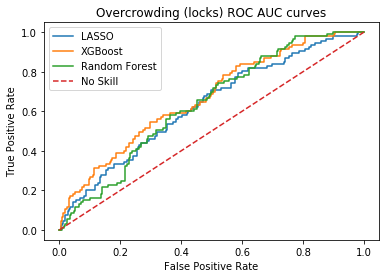

In [34]:
# roc-auc
ns_probs = [0 for _ in range(len(y_test))]
rf_probs = random_forest.predict_proba(X_test)
rf_probs = rf_probs[:,1]
xgb_probs = xgb_model.predict_proba(X_test)
xgb_probs = xgb_probs[:, 1]
lasso_probs = lasso.predict(X_test_lasso)


lasso_auc = roc_auc_score(y_test, lasso_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
ns_auc = roc_auc_score(y_test, ns_probs)


print('LASSO: ROC AUC=%.3f' % (lasso_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))


lasso_fpr, lasso_tpr, _ = roc_curve(y_test, lasso_probs)
plt.plot(lasso_fpr, lasso_tpr, label='LASSO')

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, label='Random Forest')

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Overcrowding (locks) ROC AUC curves')

plt.savefig('Overcrowding - AUC ROC.png')

plt.show()




XGBoost: f1=0.151 auc=0.427
Random Forest: f1=0.000 auc=0.343
LASSO: f1=0.325 auc=0.373


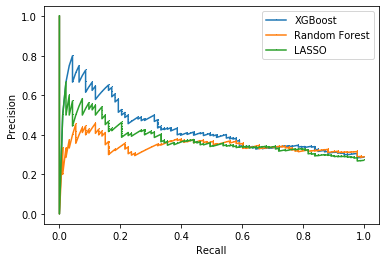

In [35]:
# predict xgboost class values
xgb_probs = xgb_model.predict_proba(X_test)
xgb_probs = xgb_probs[:,1]
yhat = xgb_model.predict(X_test)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
xgb_f1, xgb_auc = f1_score(y_test, yhat), auc(xgb_recall, xgb_precision)


# predict random forest class values
rf_probs = random_forest.predict_proba(X_test)
rf_probs = rf_probs[:,1]
yhat = random_forest.predict(X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)


# predict LASSO class values
lasso_probs = lasso.predict(X_test_lasso)
yhat = lasso.predict(X_test)
yhat = np.where(yhat > 0.5, 1, 0)
lasso_precision, lasso_recall, _ = precision_recall_curve(y_test, lasso_probs)
lasso_f1, lasso_auc = f1_score(y_test, yhat), auc(lasso_recall, lasso_precision)




print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
print('LASSO: f1=%.3f auc=%.3f' % (lasso_f1, lasso_auc))

plt.plot(xgb_recall, xgb_precision, marker=',', label='XGBoost')
plt.plot(rf_recall, rf_precision, marker=',', label='Random Forest')
plt.plot(lasso_recall, lasso_precision, marker=',', label='LASSO')



# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')


# show the legend
plt.legend()

plt.savefig('Overcrowding - Precision Recall AUC.png')


# show the plot
plt.show()

## 5. Display the feature importances

In [37]:
xgb_feature_importances = pd.DataFrame(xgb_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=False)
xgb_feature_importances.head(20)

,importance
Condo NL MDL-05,0.047446
opportunity_zone__None,0.031340
opportunity_zone__Tract 160200,0.030647
Tract 160101 Block Group 5,0.030643
Three-Family Residential,0.029607
Tract 160501 Block Group 2,0.026508
Tract 160101 Block Group 1,0.023954
Tract 160501 Block Group 4,0.023030
Foreclosure Sales - Count,0.022580
Tract 160101 Block Group 4,0.021577


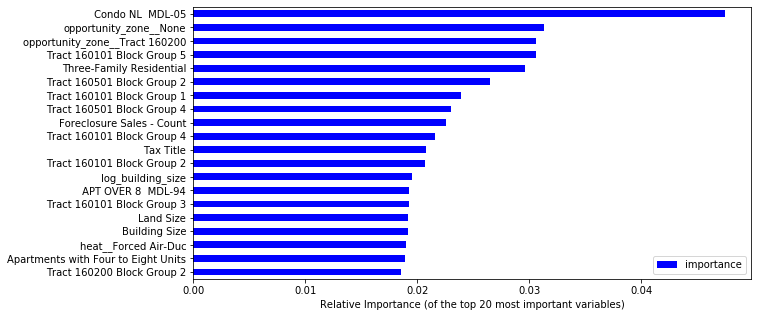

In [20]:
xgb_importances = xgb_feature_importances[:20].iloc[::-1]
xgb_importances.plot.barh(color='b', align='center', figsize=(10,5))
ax = plt.xlabel('Relative Importance (of the top 20 most important variables)')

plt.savefig('Overcrowding - Feature importances')

# Exporting the results

In [47]:
chelsea_all_predict = chelsea_all.drop(columns=['Parcel ID', 'Address', 'Target Area', 'any_coh'])
chelsea_all_predict.head(2)

,Building Permits - Count,See Click Fix - Count,Fire Incidents - Count,Foreclosure Sales - Count,Vacant Foreclosed Properties,Property Sales - Count,Property Sales - Price,40U Violations - Count,40U Violations - Fine,Police Incidents - Count,Rat Baiting - Count,Tax Title,Total Assessed Value,Bedrooms,Building Size,Full Bathrooms,Land Size,Owner Occupied,Year Built,test parcels,Police Incidents After 2015,log_land_size,log_building_size,log_assessed_value,log_bedrooms,log_bathrooms,high_risk_violation,any_high_risk,violation_total,any_violation,overcrowding_risk,any_overcrowding_risk,APT 4-UNIT MDL-94,APT 4-UNT MDL-94,APT OVER 8 MDL-94,CHAR HOUSING C,CHAR HOUSING R,Condo NL MDL-00,Condo NL MDL-05,HOUSING AUTHORITY C,OFFICE BLD MDL-96,STORE/SHOP MDL-96,Single Fam MDL-94,TWO FAMILY MDL-94,TWO FAMILY MDL-96,Accessory Land with Improvement,Apartments with Four to Eight Units,"Dept. of Education (DOE) - UMass., State Colleges, Community Colleges",Developable Residential Land,General Office Buildings,"Housing, Other (Charitable Org.)","Mixed Use (Primarily Commercial, some Industrial)","Mixed Use (Primarily Commercial, some Residential)","Mixed Use (Primarily Residential, some Commercial)",Multiple Houses on one parcel,Other Congregate Housing (includes non-transient shared living arrangements),Rooming and Boarding Houses,Single Family Residential,Three-Family Residential,Two-Family Residential,Undevelopable Residential Land,Unknown use,Tract 160101 Block Group 1,Tract 160101 Block Group 2,Tract 160101 Block Group 3,Tract 160101 Block Group 4,Tract 160101 Block Group 5,Tract 160200 Block Group 1,Tract 160200 Block Group 2,Tract 160200 Block Group 3,Tract 160300 Block Group 1,Tract 160300 Block Group 2,Tract 160400 Block Group 1,Tract 160400 Block Group 2,Tract 160501 Block Group 1,Tract 160501 Block Group 2,Tract 160501 Block Group 3,Tract 160501 Block Group 4,Tract 160501 Block Group 5,Tract 160502 Block Group 1,Tract 160502 Block Group 2,Tract 160502 Block Group 3,Tract 160601 Block Group 1,Tract 160601 Block Group 2,Tract 160602 Block Group 1,Tract 160602 Block Group 2,Tract 160602 Block Group 3,Tract 160602 Block Group 4,Tract 160602 Block Group 5,Tract 170100 Block Group 3,Tract 342101 Block Group 4,Tract 342600 Block Group 1,owner_occupied__0,owner_occupied__1,fuel__Coal or Wood,fuel__Electric,fuel__Gas,fuel__Oil,heat__Electr Basebrd,heat__Floor Furnace,heat__Forced Air-Duc,heat__Hot Air-no Duc,heat__Hot Water,heat__None,heat__Steam,opportunity_zone__None,opportunity_zone__Tract 160200,opportunity_zone__Tract 160400,analyze
0,0.0,0.0,0.0,0.0,0.0,1.0,260000.0,4.0,100.0,0.0,0.0,0,405500.0,4.0,3365.0,2.0,0.115141,1,1893.0,0,0.0,0.0,3.526985,5.607991,0.60206,0.30103,2.0,1.0,4.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,250.0,0.0,0.0,0,848600.0,0.0,13385.0,0.0,0.090972,0,1920.0,0,0.0,0.0,4.126618,5.928703,0.00000,0.00000,4.0,1.0,15.0,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0


In [51]:
final_predictions = pd.DataFrame(xgb_model.predict_proba(chelsea_all_predict.drop(columns=['violation_total', 'high_risk_violation', 'any_high_risk', 'overcrowding_risk', 'any_violation', 'test parcels', 'any_overcrowding_risk'])))
chelsea_all['probability of overcrowding'] = final_predictions[1]
chelsea_all[['Parcel ID', 'Address', 'probability of overcrowding']].to_csv('final_predictions_overcrowding.csv')